**Visual Methods - Outlier detection**

1. Box Plot
2. Scatter Plot
3. Histogram


**1. Box Plot**

A Box Plot is a great tool for detecting outliers in a dataset. 

It visually displays the distribution of data based on quartiles, and outliers are often points that fall outside the whiskers of the plot.

**Box Plot Components:**

Median: The central line in the box (50th percentile).

Upper Quartile (Q3): The top of the box (75th percentile).

Lower Quartile (Q1): The bottom of the box (25th percentile).

Whiskers: Lines extending from the box to the highest and lowest values within 1.5 * IQR (Interquartile Range).

Outliers: Any points outside the whiskers (i.e., points beyond 1.5 * IQR).


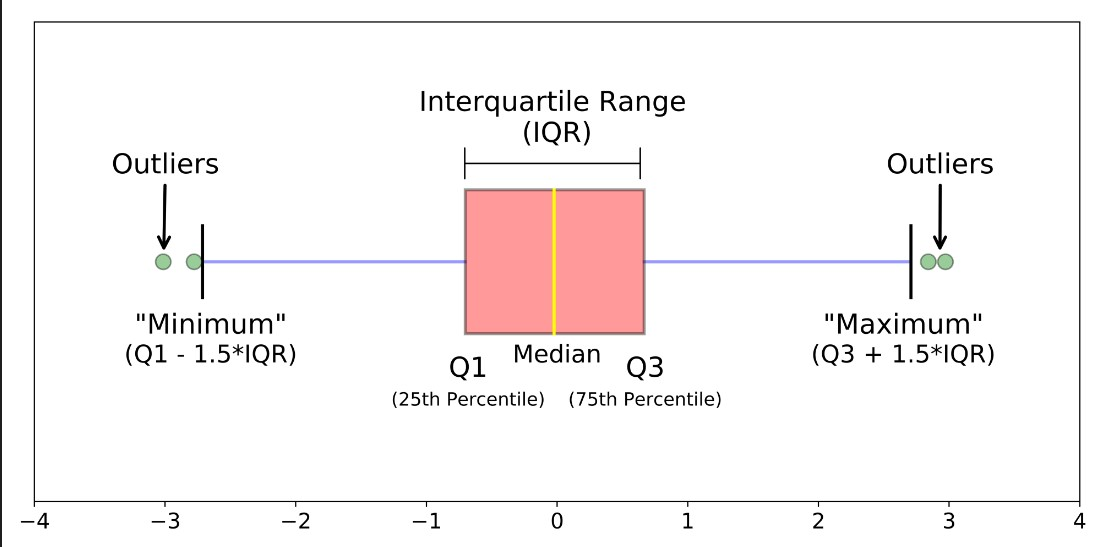

What is IQR

The Interquartile Range, or IQR, is a measure of statistical dispersion. It represents the range within which the middle 50% of the data falls.

IQR = Q3 — Q1

To identify outliers using the IQR method, we establish two boundaries:
    
Lower Bound: Q1–1.5 * IQR 
    
Upper Bound: Q3 + 1.5 * IQR

Points outside these bounds are considered outliers.



In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [15]:
# Sample dataset of exam scores
data = [85, 87, 90, 88, 92, 100, 105, 98, 200, 92, 88, 87, 89]
df = pd.DataFrame(data, columns=["Scores"])

# Calculate Q1, Q3, and IQR
Q1 = np.percentile(df["Scores"], 25)
Q3 = np.percentile(df["Scores"], 75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

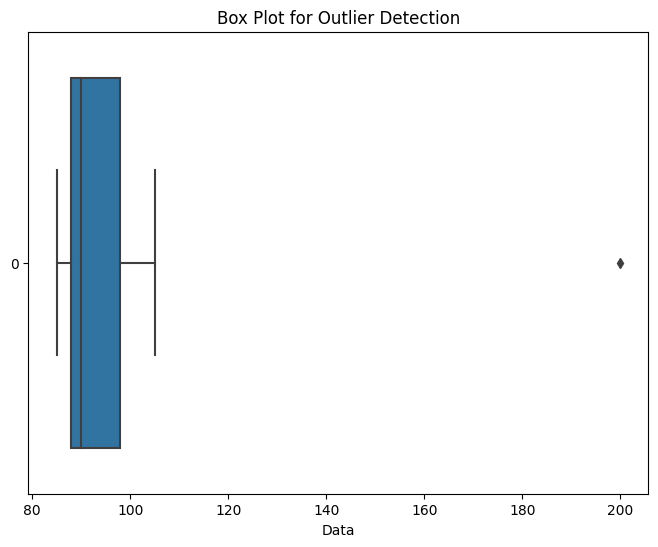

In [16]:
# Create a box plot to visualize the data and outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data, orient = 'h')

# Add labels and title
plt.title("Box Plot for Outlier Detection")
plt.xlabel("Data")

# Show the plot
plt.show()


The Box Plot is a powerful tool for visualizing data distribution and identifying outliers. 

By observing which points fall outside the whiskers, we can easily detect data points that are significantly different from the rest of the dataset.

This is especially useful when dealing with large datasets where manually inspecting values for outliers would be difficult.

**2. Scatter Plot - Outlier Detection**

A scatter plot is another useful tool for visualizing outliers, especially when the data is in a 2D format. 

In a scatter plot, outliers are points that are distant from the main concentration of data points. 

These points are often easily visible because they do not follow the general pattern or trend that the other points exhibit.



**How to Detect Outliers Using a Scatter Plot:**

1. Visual Inspection: Outliers appear as points that are far from the dense cluster of other points.

2. Statistical Methods: You can use a statistical approach (such as Z-score or IQR) to define what qualifies as an outlier and then highlight those points on the scatter plot.

**1: Scatter Plot for Visual Outlier Detection**

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (e.g., data points from a normal distribution)
np.random.seed(42)

# Generate 100 random points for x and y
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 0.5, 100)  # Linear relationship with some noise

# Introduce some outliers
x_outliers = np.array([5, 6, -5, -6])
y_outliers = np.array([20, 25, -20, -25])

# Combine the outliers with the original data
x_combined = np.concatenate([x, x_outliers])
y_combined = np.concatenate([y, y_outliers])


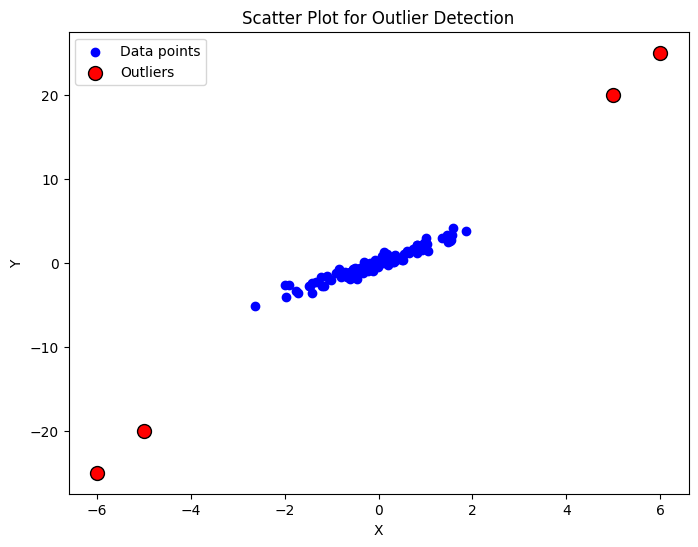

In [18]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_combined, y_combined, color='blue', label='Data points')

# Highlight outliers in red
plt.scatter(x_outliers, y_outliers, color='red', label='Outliers', s=100, edgecolor='black')

# Add title and labels
plt.title("Scatter Plot for Outlier Detection")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Show plot
plt.show()


In the scatter plot:

Most of the points will form a pattern (in this case, a linear relationship).

The outliers will appear as distinct points that deviate significantly from the rest of the data.


**Example 2: Using Statistical Methods for Outlier Detection on Scatter Plot**

We can enhance the scatter plot by applying statistical methods such as Z-score or Interquartile Range (IQR) to identify outliers.

1. Calculate Z-Score for Outlier Detection


In [19]:
from scipy.stats import zscore

# Calculate the Z-scores for x and y values
z_scores_x = zscore(x_combined)
z_scores_y = zscore(y_combined)

# Identify outliers based on Z-score threshold (e.g., |Z| > 3)
threshold = 3
outliers_zscore = np.where((np.abs(z_scores_x) > threshold) | (np.abs(z_scores_y) > threshold))

# Extract outlier points
x_outliers_zscore = x_combined[outliers_zscore]
y_outliers_zscore = y_combined[outliers_zscore]


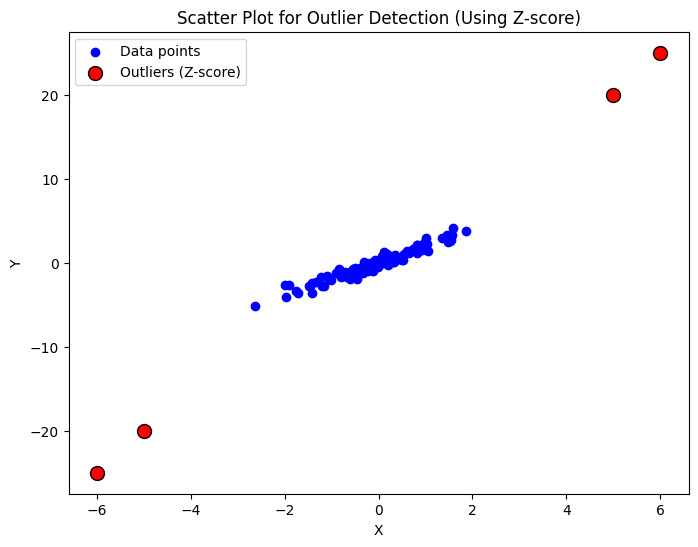

In [20]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_combined, y_combined, color='blue', label='Data points')

# Highlight outliers in red
plt.scatter(x_outliers_zscore, y_outliers_zscore, color='red', label='Outliers (Z-score)', s=100, edgecolor='black')

# Add title and labels
plt.title("Scatter Plot for Outlier Detection (Using Z-score)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Show plot
plt.show()


**Visual Outlier Detection:** Scatter plots are excellent for visually identifying outliers, especially when the data has a clear pattern or trend. Outliers are often easily spotted as points that lie far from the main cluster of data points.

**Statistical Methods for Outlier Detection:** To identify outliers programmatically, methods like the Z-score or Interquartile Range (IQR) can be applied. These methods help in objectively identifying points that deviate significantly from the data distribution.

**3.Histogram - Outlier Detection Technique**

A histogram is another valuable tool for detecting outliers in data. 

It shows the distribution of data by plotting the frequency of data points within specific ranges (bins). 

Outliers can often be detected as the points that fall far from the main bulk of the data, either in the extreme left or right ends of the histogram.

**How Histogram Helps Detect Outliers:**

**Normal Distribution:** In a normal (bell-shaped) distribution, the data tends to cluster around the center, with fewer data points towards the extremes (the tails). Outliers are typically located in these extreme regions.

**Skewed Distribution:** In skewed distributions, outliers might appear on the side with fewer data points, which are far away from the central cluster.

**Bin Ranges:** Outliers are the values that do not fall within the normal range of the histogram bins and may appear as isolated bars or extreme values.

Steps for Outlier Detection in a Histogram:
1. Create the Histogram to visualize the distribution of data.
2. Identify the tails of the histogram (extreme ends of the data).
3. Use a statistical threshold (like IQR or Z-score) to mark outliers.
4. Outliers will appear as bars or data points far from the main cluster.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Generate normal data (mean=50, std=10, size=1000)
np.random.seed(42)
data = np.random.normal(50, 10, 1000)

# Introduce some outliers (values far from the normal distribution)
outliers = np.array([150, 160, 170, 180, 200, -50, -60, -70])

# Combine the outliers with the original data
data_with_outliers = np.concatenate([data, outliers])


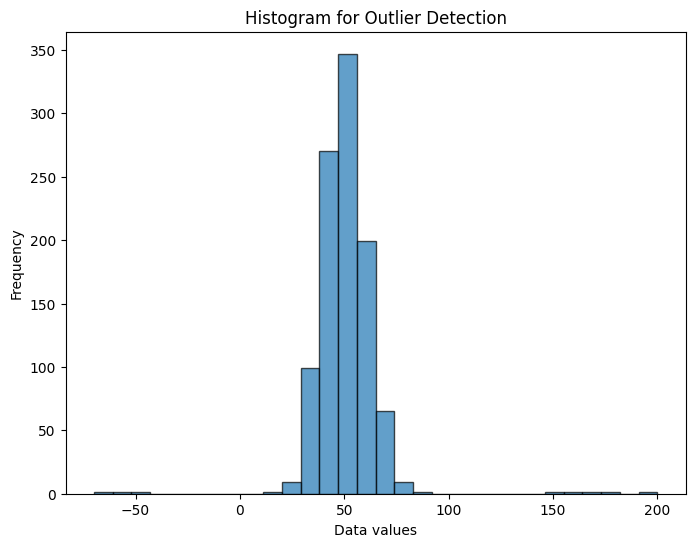

In [23]:
# Create a histogram with 30 bins
plt.figure(figsize=(8, 6))
plt.hist(data_with_outliers, bins=30, edgecolor='black', alpha=0.7)

# Add labels and title
plt.title("Histogram for Outlier Detection")
plt.xlabel("Data values")
plt.ylabel("Frequency")

# Show the plot
plt.show()


Interpret the Histogram for Outliers

Main Data Cluster: Most of the data points should fall in the middle, creating a peak in the histogram.

Outliers: The bars at the extreme left or right (far away from the main peak) represent the outliers.

**Statistical Thresholds for Outlier Detection**

To detect outliers more formally, we can use statistical methods such as Interquartile Range (IQR) or Z-score to define thresholds beyond which data points are considered outliers.


**Example: Using IQR for Outlier Detection**

In [24]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(data_with_outliers, 25)
Q3 = np.percentile(data_with_outliers, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers based on these bounds
outliers_iqr = data_with_outliers[(data_with_outliers < lower_bound) | (data_with_outliers > upper_bound)]

print(f"Outliers based on IQR method: {outliers_iqr}")


Outliers based on IQR method: [ 23.80254896  77.20169167  88.52731491  17.5873266   80.78880808
  23.03113357  23.49030192  76.32382065 150.         160.
 170.         180.         200.         -50.         -60.
 -70.        ]


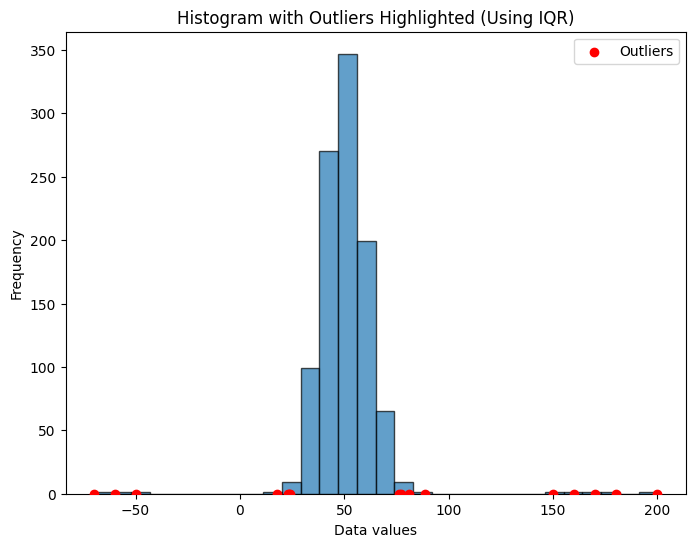

In [25]:
# Create a histogram with 30 bins
plt.figure(figsize=(8, 6))
plt.hist(data_with_outliers, bins=30, edgecolor='black', alpha=0.7)

# Highlight the outliers in red
plt.scatter(outliers_iqr, np.zeros_like(outliers_iqr), color='red', label="Outliers", zorder=5)

# Add labels and title
plt.title("Histogram with Outliers Highlighted (Using IQR)")
plt.xlabel("Data values")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()


Using a histogram for outlier detection is a visual and intuitive approach. The key steps are:

1. Visualize the data distribution using a histogram.
2. Look for isolated bars or extreme values far from the rest of the data.
3. Optionally, use statistical methods like IQR to define thresholds and detect outliers more precisely.

Histograms are particularly useful when you need to get a sense of the overall distribution of your data and when you want to quickly identify points that don't fit the general pattern of the rest of the data.